In [21]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("max_colwidth", 500)
%matplotlib inline

In [22]:
#Load Data
laptop = pd.read_csv('laptop_data_price_prediction.csv')
laptop.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [23]:
# Descriptive Statistics
round(laptop.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Ram,1273.0,8.45,5.10,2.00,4.00,8.00,8.00,64.00
Weight,1273.0,2.04,0.67,0.69,1.50,2.04,2.31,4.70
Price,1273.0,10.83,0.62,9.13,10.39,10.87,11.29,12.69
TouchScreen,1273.0,0.15,0.35,0.00,0.00,0.00,0.00,1.00
Ips,1273.0,0.28,0.45,0.00,0.00,0.00,1.00,1.00
Ppi,1273.0,146.95,42.93,90.58,127.34,141.21,157.35,352.47
HDD,1273.0,413.72,518.05,0.00,0.00,0.00,1000.00,2000.00
SSD,1273.0,186.25,186.53,0.00,0.00,256.00,256.00,1024.00


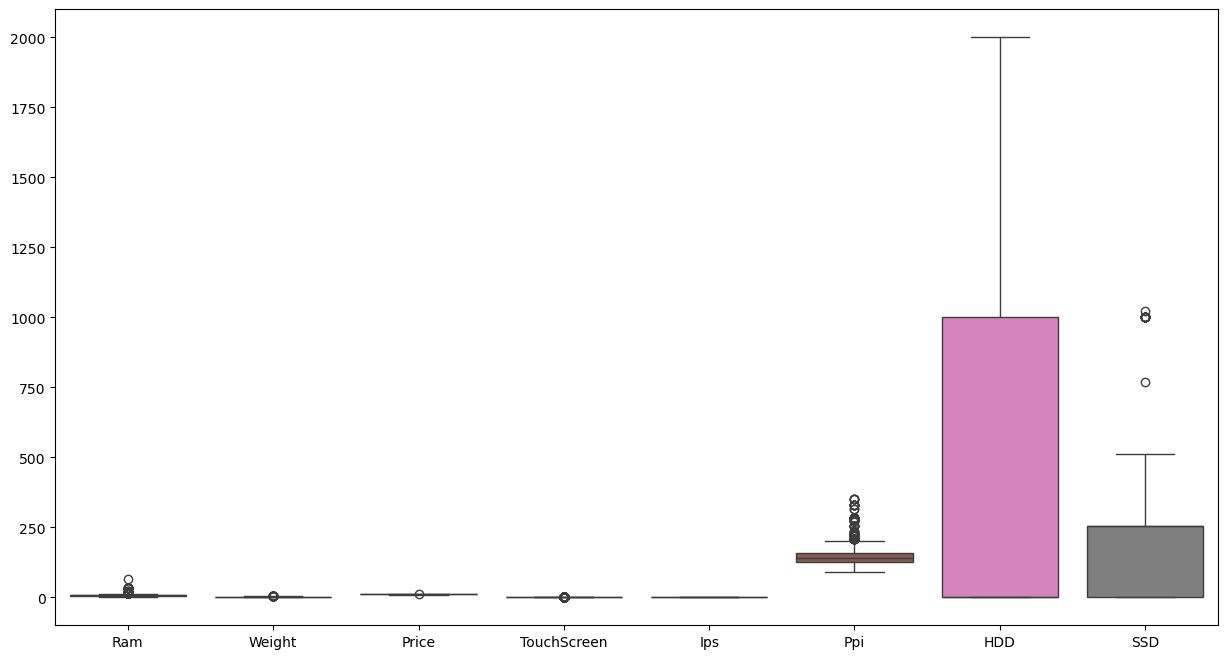

In [24]:
#Boxplot Visualization
plt.figure(figsize=(15,8))
sns.boxplot(data=laptop)
plt.show()

In [25]:
#Identify number of Classes in Gpu_brand
unique_class = {'GPU Brand':laptop['Gpu_brand'].unique(),
                'Company':laptop['Company'].unique(),
                'Type Name':laptop['TypeName'].unique(),
                'CPU Brand' :laptop['Cpu_brand'].unique(),
                'OS':laptop['Os'].unique()}
unique_df = pd.DataFrame(list(unique_class.items()), columns=['Attributes', 'Unique Value'])
unique_df

,Attributes,Unique Value
0,GPU Brand,"[Intel, AMD, Nvidia]"
1,Company,"[Apple, HP, Acer, Asus, Dell, Lenovo, Chuwi, MSI, Microsoft, Toshiba, Huawei, Xiaomi, Vero, Razer, Mediacom, Samsung, Google, Fujitsu, LG]"
2,Type Name,"[Ultrabook, Notebook, Netbook, Gaming, 2 in 1 Convertible, Workstation]"
3,CPU Brand,"[Intel Core i5, Intel Core i7, AMD Processor, Intel Core i3, Other Intel Processor]"
4,OS,"[Mac, Others, Windows]"


In [26]:
# Drop Categrical Attributes
numerical_df =laptop.drop(laptop.columns[[0,1,8,12]], axis = 1)
numerical_df.head()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Gpu_brand
0,8,1.37,11.175755,0,1,226.983005,0,128,Intel
1,8,1.34,10.776777,0,0,127.677940,0,0,Intel
2,8,1.86,10.329931,0,0,141.211998,0,256,Intel
3,16,1.83,11.814476,0,1,220.534624,0,512,AMD
4,8,1.37,11.473101,0,1,226.983005,0,256,Intel


### Regression using MLR

In [27]:
#Create x and y variables
numerical_df = numerical_df.drop('Gpu_brand', axis=1)
x = numerical_df.drop('Price',axis=1).to_numpy()
y = numerical_df['Price'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [28]:
#Script for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
from sklearn.metrics import r2_score

for name,method in [('Linear Regression', LinearRegression(n_jobs=-1))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),
                         numerical_df.drop('Price',axis=1).columns,columns=['Coefficients'])
print('\n')
print(coeff_table)
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(r2_score(y_test, predict)))
adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))

print('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 


Method: Linear Regression

Intercept: 10.85


             Coefficients
Ram              0.227542
Weight           0.049508
TouchScreen     -0.018107
Ips              0.048490
Ppi              0.141563
HDD              0.011202
SSD              0.200797

R2: 0.62
Adj_R2: 0.62

Mean Absolute Error: 0.30
Mean Squared Error: 0.15
Root Mean Squared Error: 0.38


In [29]:
#Forecast Table
predict2 = predict.T
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':predict2.round(2),'Difference':diff.round(2)})
print('\nForecast Table')
FcstTble.head()


Forecast Table


,Actual,Predicted,Difference
0,10.995752,10.99,-0.01
1,10.580859,10.84,0.26
2,11.470547,11.50,0.03
3,11.212620,10.95,-0.27
4,11.626843,10.84,-0.79


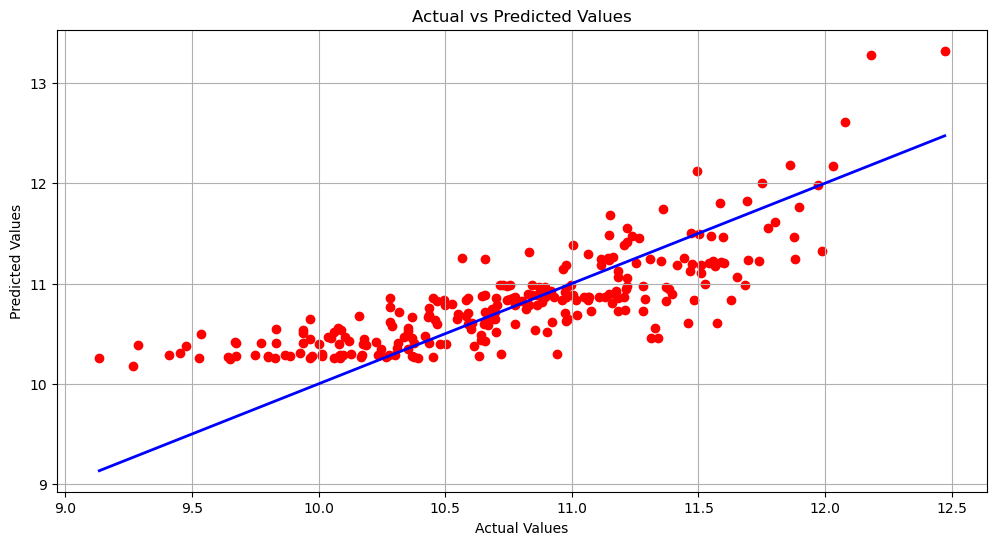

In [30]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))  # Adjust size as needed

plt.scatter(FcstTble['Actual'], FcstTble['Predicted'], color='red')
plt.plot([FcstTble['Actual'].min(), FcstTble['Actual'].max()], [FcstTble['Actual'].min(), FcstTble['Actual'].max()], color='blue', lw=2)

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


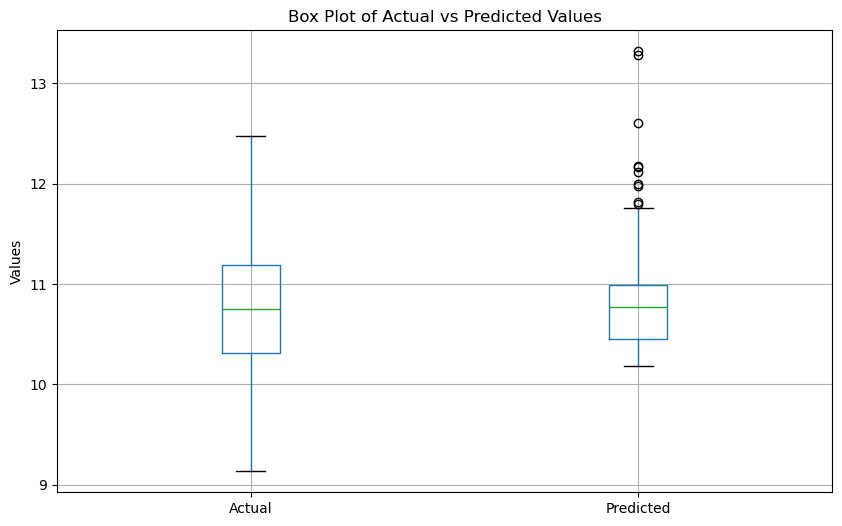

In [31]:
import matplotlib.pyplot as plt

# Create a DataFrame for Actual and Predicted values
data = pd.DataFrame({
    'Actual': FcstTble['Actual'],
    'Predicted': FcstTble['Predicted']
})

# Create a box plot
plt.figure(figsize=(10, 6))  # Adjust size as needed
data.boxplot()

plt.title('Box Plot of Actual vs Predicted Values')
plt.ylabel('Values')
plt.grid(True)
plt.show()


The linear regression model using numerical attributes has a moderate fit, with an **R² of 0.62**, indicating it explains 62% of the variance in laptop prices. Key features like **RAM**, **PPI**, and **SSD** have positive contributions, while **TouchScreen** slightly decreases predicted price. The model's average prediction error is **0.30** (MAE), with an **RMSE** of **0.3**, suggesting a moderate level of accuracy. The **Adjusted R²** also being **0.62** implies no overfitting. To improve our model's performance we have option to consider adding categorical attributes or using non-linear models to better capture the complexity of price influences.

### Model Improvement

#### 1. Including Categorical Values in Calculation

Tried encoding all the categorical values but the model didn't seem to improve it's accuracy.

In [ ]:
# Include necessary libraries
from sklearn.preprocessing import OneHotEncoder

# Convert categorical variables
categorical_features = ['Compay', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(laptop[categorical_features])

# Create a DataFrame for encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Combine with original dataset
df = laptop.join(encoded_df).drop(categorical_features, axis=1)
df


#### 2. Feature Engineering

Creating a new feature Total Storage seems to be not helping the model to perform well in our case.

In [33]:
# Create Total Storage feature
df = laptop
df['Total_Storage'] = df['HDD'] + df['SSD']
df.drop(['HDD', 'SSD'], axis=1, inplace=True)
df


,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,Gpu_brand,Os,Total_Storage
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,Intel,Mac,128
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,Intel,Mac,0
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,Intel,Others,256
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,AMD,Mac,512
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,Intel,Mac,256
...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,Nvidia,Windows,500
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,Intel,Windows,128
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,Intel,Windows,512
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,Intel,Windows,0


#### 3. Normalization and Standarization

In [34]:
from sklearn.preprocessing import StandardScaler
df = laptop
# Standardize the features
scaler = StandardScaler()
numerical_features = ['Ram', 'Weight', 'Ppi', 'Price', 'Total_Storage']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()


,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,Gpu_brand,Os,Total_Storage
0,Apple,Ultrabook,-0.087852,-1.003171,0.561156,0,1,1.865121,Intel Core i5,Intel,Mac,-0.993740
1,Apple,Ultrabook,-0.087852,-1.048016,-0.083060,0,0,-0.449147,Intel Core i5,Intel,Mac,-1.263247
2,HP,Notebook,-0.087852,-0.270711,-0.804569,0,0,-0.133741,Intel Core i5,Intel,Others,-0.724233
3,Apple,Ultrabook,1.481770,-0.315556,1.592481,0,1,1.714844,Intel Core i7,AMD,Mac,-0.185220
4,Apple,Ultrabook,-0.087852,-1.003171,1.041273,0,1,1.865121,Intel Core i5,Intel,Mac,-0.724233


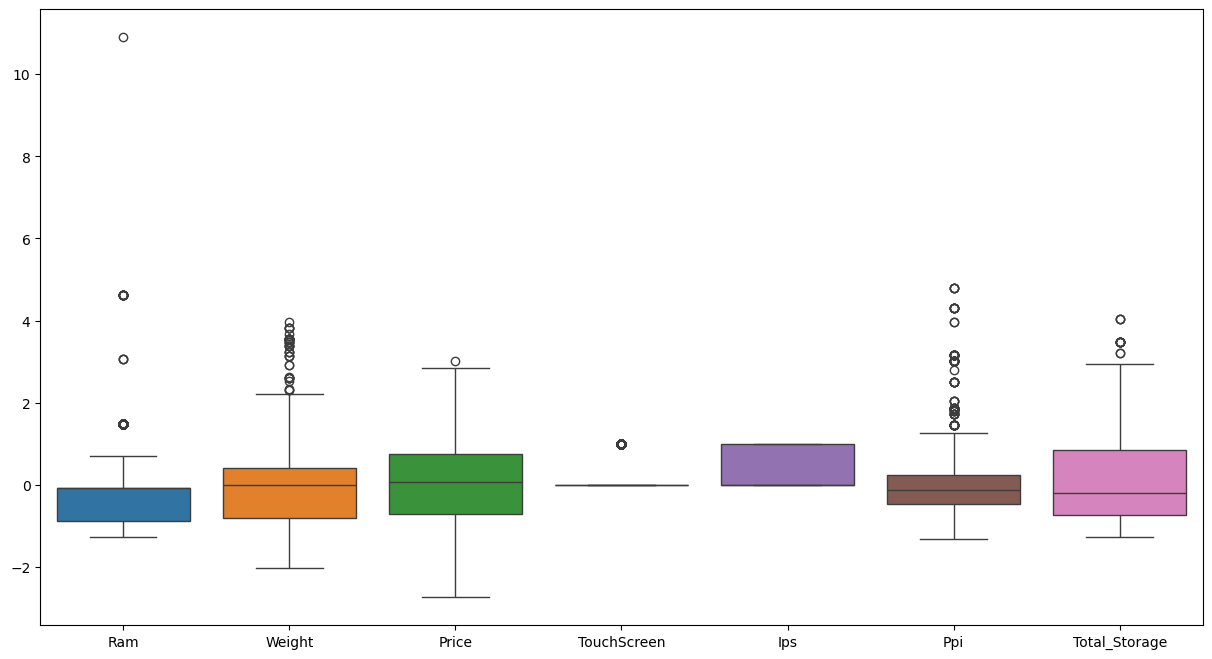

In [35]:
#Boxplot Visualization
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.show()

In [36]:
#Create x and y variables
df = df.drop(['Company', 'TypeName', 'Cpu_brand', 'Os','Gpu_brand'],axis=1)
x = df.drop('Price',axis=1).to_numpy()
y = df['Price'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [37]:
#Script for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
from sklearn.metrics import r2_score

for name,method in [('Linear Regression', LinearRegression(n_jobs=-1))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),
                         df.drop('Price',axis=1).columns,columns=['Coefficients'])
print('\n')
print(coeff_table)
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(r2_score(y_test, predict)))
adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))

print('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 


Method: Linear Regression

Intercept: 0.03


               Coefficients
Ram                0.570682
Weight             0.029648
TouchScreen       -0.018815
Ips                0.080473
Ppi                0.299869
Total_Storage     -0.027957

R2: 0.57
Adj_R2: 0.57

Mean Absolute Error: 0.51
Mean Squared Error: 0.43
Root Mean Squared Error: 0.66


In [38]:
#Forecast Table
predict2 = predict.T
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':predict2.round(2),'Difference':diff.round(2)})
print('\nForecast Table')
FcstTble.head()


Forecast Table


,Actual,Predicted,Difference
0,0.270511,0.23,-0.04
1,-0.399404,-0.09,0.30
2,1.037149,0.66,-0.38
3,0.620682,0.08,-0.54
4,1.289515,-0.13,-1.42


#### Observation

Enven after trying several methods to increase the model performance, we were unable too do so. So, from our observation the most significant performance on predicting laptop price is our first method.

<h5>Method: Linear Regression</h5>

<b>Intercept: 10.85</b>
In this case, it means that when all predictor values are zero, the predicted value of the dependent variable is 10.85 i.e. base price of laptop is CA$1085.

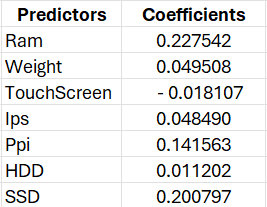



<b>R2: 0.62</b><br>
<b>Adj_R2: 0.62</b><br>

<b>Mean Absolute Error: 0.30</b><br>
<b>Mean Squared Error: 0.15</b><br>
<b>Root Mean Squared Error: 0.38</b>

Since our first analysis has lower MAE, MSE, and RMSE values compared to the New Result, this indicates that the predictions from first analysis are closer to the actual values on average and have smaller errors overall. Moreover, including classifiers like Randomforest Classifier and applying polynomial features to our data may be able to establish relatinship between our predictors and the target.